<a href="https://colab.research.google.com/github/sharifashik591/Fashion_MNIST_with_CNN/blob/main/Fashion_MNIST_classification_(CNN)_with_94_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  Install any dependences
! pip install keras

# Introduction ⬇

## Dataset

1. Fashion-MNIST is a dataset of Zalando's article images—consisting of a 
training set of 60,000 examples and a test set of 10,000 examples.

2. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

3. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. 

4. It shares the same image size and structure of training and testing splits.

# Load packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns



# Deep Learning Libraries
import tensorflow
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.utils import to_categorical

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

# Load the Fashion MNIST data directly from TensorFlow

In [ ]:
data=tensorflow.keras.datasets.fashion_mnist

In [ ]:
(x_train,y_train), (x_test,y_test)=data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# shape of this dataset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
type(x_train)

print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

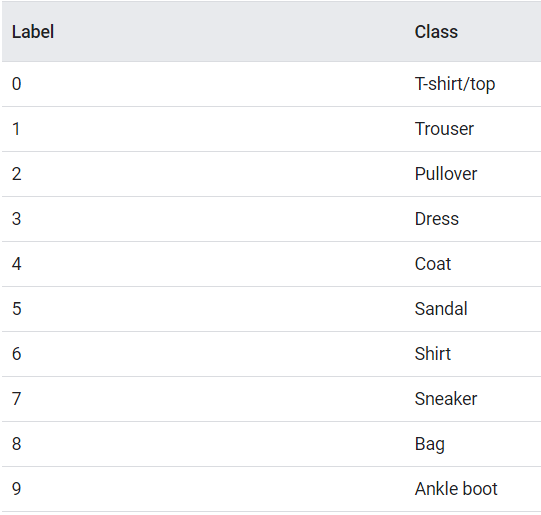







## Visulize Dataset

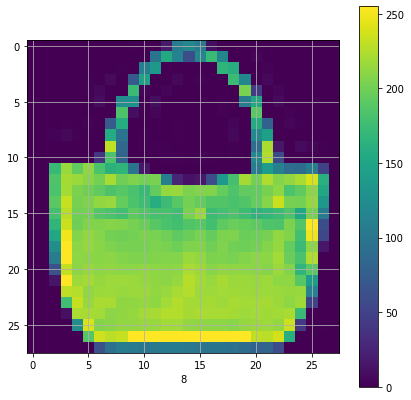

In [ ]:
plt.figure(figsize=(7,7))
plt.imshow(x_train[100])
plt.colorbar()
plt.grid(True)
plt.xlabel(y_train[100])
plt.show()

In [ ]:
# Make class list
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

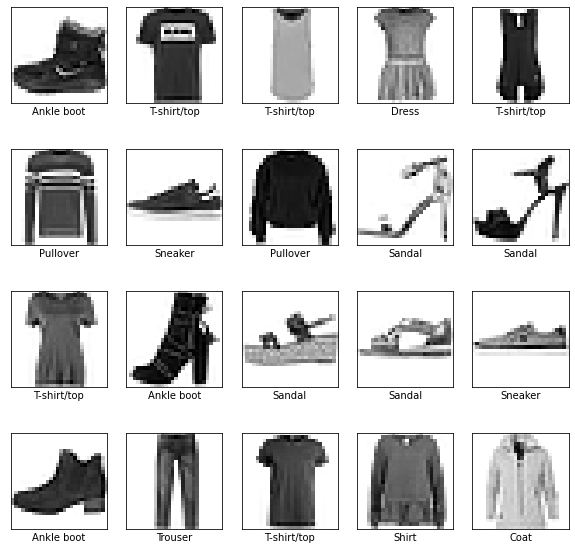

In [ ]:
# plot first 20 dataset

plt.figure(figsize=(10,10))

for i in range(20):
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])
plt.show()

# Data Processing




## Reshape

In [ ]:
# The first parameter in reshape indicates the number of examples.
# We pass it as -1, which means that it is an unknown dimension and we want numpy to figure it out.

x_train=x_train.reshape((-1,28,28,1))
x_test=x_test.reshape((-1,28,28,1))


In [ ]:
x_train.shape

(60000, 28, 28, 1)

## Normalization
*The Pixel Values are often stored as Integer Numbers in the range 0 to 255, the range that a single 8-bit byte can offer. They need to be scaled down to [0,1] in order for Optimization Algorithms to work much faster. Here, we acheive Zero Mean and Unit Variance.*

Normalization is carried out as follows:

> x = (x - min) / (max - min) ; Here min=0 and max=255








In [ ]:
x_train_norm=x_train.astype("float32")/ 255.0
x_test_norm=x_test.astype("float32")/ 255.0

## One Hot Encoding
The labels are given as integers between 0-9. We need to one hot encode them , Eg 8 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0] .

`We have 10 digits [0-9] or classes, therefore we one-hot-encode the target variable with 10 classes`

In [ ]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

## Splitting Data into Train and Validation Set
Now we are gonna split the training data into Train and Validation Set. Train set is used for Training the model and Validation set is used for Evaluating our Model's Performance on the Dataset.

This is achieved using the train_test_split method of scikit learn library.

In [ ]:
from sklearn.model_selection import train_test_split
x_test,x_val,y_test,y_val=train_test_split(x_test_norm,y_test,test_size=0.4, random_state=np.random.seed(60))

In [ ]:
x_test.shape, x_val.shape, y_test.shape, y_val.shape

((6000, 28, 28, 1), (4000, 28, 28, 1), (6000, 10), (4000, 10))

**Now datset are totally ready for build CNN model** 🙂




## Training a Convolutional Neural Network

### Build Model

In [ ]:
# Building a ConvNet
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

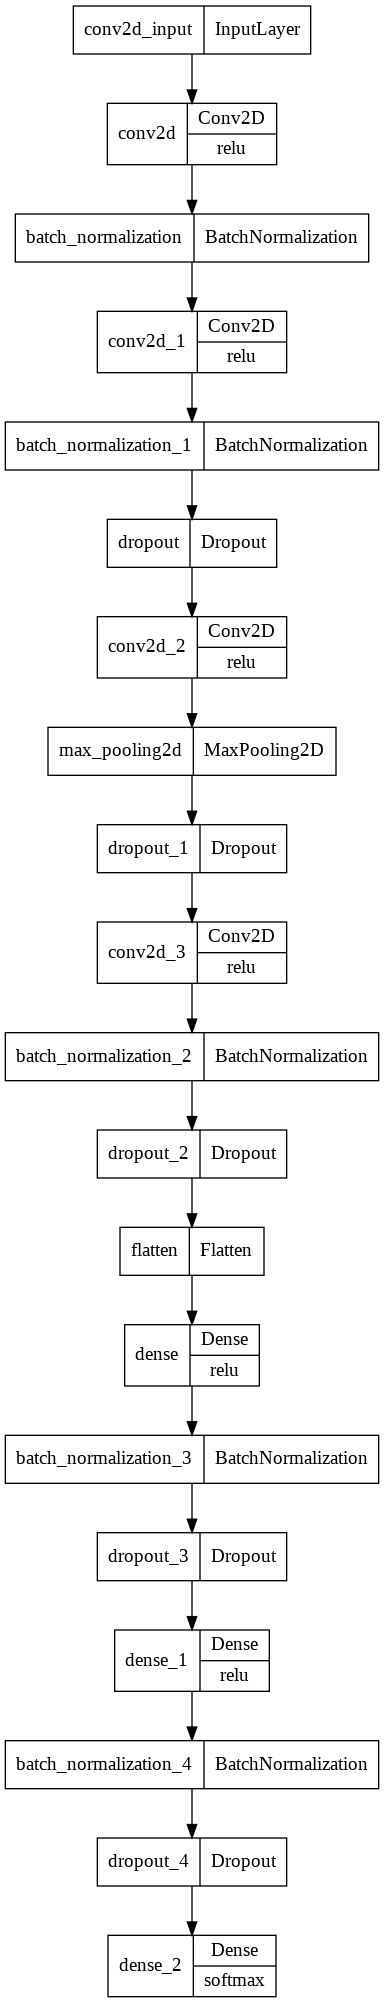

In [ ]:
# Model Summary

tensorflow.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_layer_names=True,
    rankdir='TB',
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

### Compiling the Model

In [ ]:
# Optimizer
optimizer = Adam(lr=0.001 )
# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])



In [ ]:
y_val.shape

(4000, 10)

### Fitting the Model

In [ ]:
history=model.fit(x_train_norm,
          y_train,
          epochs=30, 
          batch_size=128,
          verbose=1, 
          validation_data=(x_val,y_val))

Epoch 1/30
469/469 [==============================] - 28s 25ms/step - loss: 0.5221 - accuracy: 0.8210 - val_loss: 0.6157 - val_accuracy: 0.7530
Epoch 2/30
469/469 [==============================] - 11s 22ms/step - loss: 0.3132 - accuracy: 0.8880 - val_loss: 0.2647 - val_accuracy: 0.9062
Epoch 3/30
469/469 [==============================] - 11s 23ms/step - loss: 0.2602 - accuracy: 0.9083 - val_loss: 0.2517 - val_accuracy: 0.9100
Epoch 4/30
469/469 [==============================] - 11s 23ms/step - loss: 0.2321 - accuracy: 0.9174 - val_loss: 0.2337 - val_accuracy: 0.9222
Epoch 5/30
469/469 [==============================] - 11s 23ms/step - loss: 0.2089 - accuracy: 0.9251 - val_loss: 0.2270 - val_accuracy: 0.9170
Epoch 6/30
469/469 [==============================] - 11s 23ms/step - loss: 0.1959 - accuracy: 0.9298 - val_loss: 0.2246 - val_accuracy: 0.9233
Epoch 7/30
469/469 [==============================] - 11s 23ms/step - loss: 0.1749 - accuracy: 0.9369 - val_loss: 0.2196 - val_accuracy:

### Evaluating the Model

In [ ]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

188/188 [==============================] - 1s 5ms/step - loss: 0.2473 - accuracy: 0.9415
Loss: 0.2473
Accuracy: 0.9415


## Prediction

In [ ]:
prediction=model.predict(x_test).round(2)

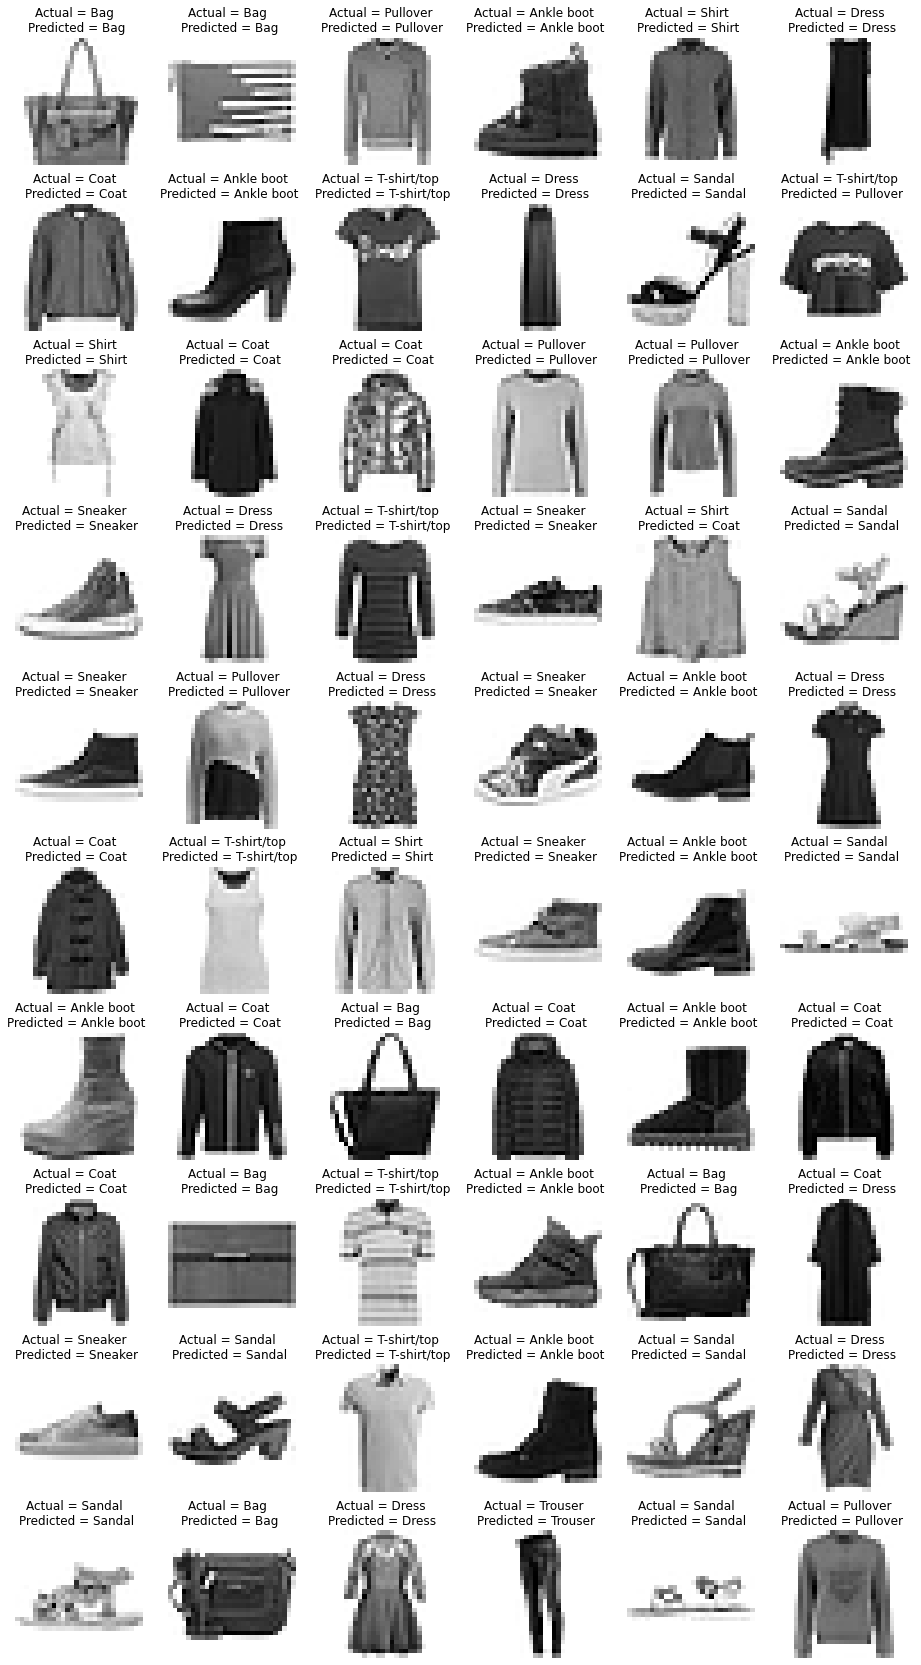

In [ ]:
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary)
  plt.title('Actual = {}  \nPredicted = {} '.format(class_names[np.argmax(y_test[i])],  class_names[np.argmax(prediction[i])]))
  plt.axis('off')
  plt.savefig('Predction.png')

# Confusion matrix

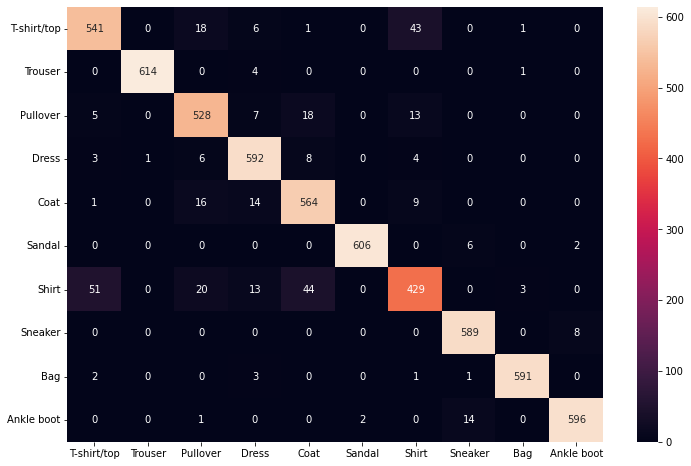

In [ ]:
plt.figure(figsize=(12,8))
prediction_labels=[np.argmax(label) for label in prediction]
cm=confusion_matrix(np.argmax( y_test, axis=1),prediction_labels)
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_names,yticklabels=class_names )

# Classification Report
> The classification report visualizer displays the precision, recall,  F1, and support scores for the model.

In [ ]:
clr=classification_report(np.argmax( y_test, axis=1),prediction_labels,target_names=class_names)
print(clr)

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.89      0.89       610
     Trouser       1.00      0.99      1.00       619
    Pullover       0.90      0.92      0.91       571
       Dress       0.93      0.96      0.94       614
        Coat       0.89      0.93      0.91       604
      Sandal       1.00      0.99      0.99       614
       Shirt       0.86      0.77      0.81       560
     Sneaker       0.97      0.99      0.98       597
         Bag       0.99      0.99      0.99       598
  Ankle boot       0.98      0.97      0.98       613

    accuracy                           0.94      6000
   macro avg       0.94      0.94      0.94      6000
weighted avg       0.94      0.94      0.94      6000



Accuracy and Loss curve

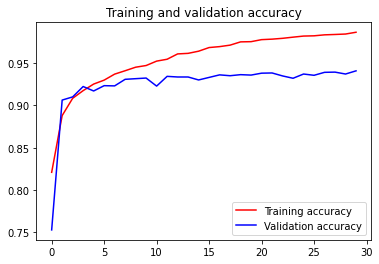

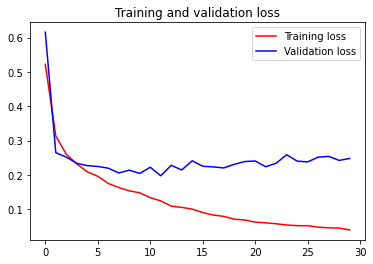

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Save Model

In [ ]:
model.save('fashion_mnist.h5')



> **Highly appreciate your questions or feedback related to this notebook.** ✔